# Importing The Tools 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from xgboost import  XGBRegressor

In [2]:
%matplotlib inline

# Importing The Data and take a tour in the data 

In [76]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_copy = test_data
store_data = pd.read_csv("store.csv")

/home/omar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print("Shape of Train data :", train_data.shape)
print("Shape of Test data :", test_data.shape)
print("Shape of Store data :", store_data.shape)

Shape of Train data : (1017209, 9)
Shape of Test data : (41088, 8)
Shape of Store data : (1115, 10)


In [5]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
store_data.head(100)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [8]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [10]:
store_data.isnull().sum().sort_values(ascending = False)

PromoInterval                544
Promo2SinceYear              544
Promo2SinceWeek              544
CompetitionOpenSinceYear     354
CompetitionOpenSinceMonth    354
CompetitionDistance            3
Promo2                         0
Assortment                     0
StoreType                      0
Store                          0
dtype: int64

In [11]:
store_data['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [12]:
train_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [13]:
train_data['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [14]:
train_data['Open'].unique()

array([1, 0])

In [15]:
train_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [16]:
train_data['Promo'].unique()

array([1, 0])

In [17]:
train_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [18]:
store_data['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [19]:
print(sum(train_data["Open"] == 0))
print(sum(train_data["Open"] == 1))

172817
844392


In [20]:
print(sum(test_data["Open"] == 0))
print(sum(test_data["Open"] == 1))

5984
35093


In [21]:
print(sum(train_data["StateHoliday"] == 'a'))
print(sum(train_data["StateHoliday"] == 'b'))
print(sum(train_data["StateHoliday"] == 'c'))
print(sum(train_data["StateHoliday"] == 0))

20260
6690
4100
131072


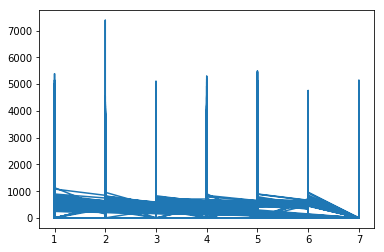

In [22]:
plt.plot(train_data['DayOfWeek'],train_data['Customers'])

In [23]:
train_data[['Sales','Customers','Promo','SchoolHoliday']].corr(method='pearson')

,Sales,Customers,Promo,SchoolHoliday
Sales,1.000000,0.894711,0.452345,0.085124
Customers,0.894711,1.000000,0.316169,0.071568
Promo,0.452345,0.316169,1.000000,0.067483
SchoolHoliday,0.085124,0.071568,0.067483,1.000000


In [24]:
train_data['Mon'] = train_data["Date"].apply(lambda x : int(x[5:7]))
train_data['Yr'] = train_data["Date"].apply(lambda x : int(x[:4]))
train_data["HolidayBin"] = train_data.StateHoliday.map({"0": 0, "a": 1, "b": 1, "c": 1})

In [25]:
test_data['Mon'] = test_data["Date"].apply(lambda x : int(x[5:7]))
test_data['Yr'] = test_data["Date"].apply(lambda x : int(x[:4]))
test_data["HolidayBin"] = test_data.StateHoliday.map({"0": 0, "a": 1, "b": 1, "c": 1})

In [26]:
train_data = train_data.merge(store_data)
test_data =test_data.merge(store_data)

In [27]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Mon,...,HolidayBin,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,7,...,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,7,...,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,7,...,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,7,...,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,7,...,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [28]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Mon,Yr,HolidayBin,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [29]:
train_data.isnull().sum().sort_values(ascending= False)

PromoInterval                508031
Promo2SinceWeek              508031
Promo2SinceYear              508031
CompetitionOpenSinceYear     323348
CompetitionOpenSinceMonth    323348
HolidayBin                   131072
CompetitionDistance            2642
Promo                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Yr                                0
StateHoliday                      0
SchoolHoliday                     0
Mon                               0
StoreType                         0
Assortment                        0
Promo2                            0
Store                             0
dtype: int64

In [30]:
test_data.isnull().sum().sort_values(ascending= False)

PromoInterval                17232
Promo2SinceWeek              17232
Promo2SinceYear              17232
CompetitionOpenSinceYear     15216
CompetitionOpenSinceMonth    15216
CompetitionDistance             96
Open                            11
StateHoliday                     0
Store                            0
DayOfWeek                        0
Date                             0
Promo                            0
Yr                               0
SchoolHoliday                    0
Mon                              0
HolidayBin                       0
StoreType                        0
Assortment                       0
Promo2                           0
Id                               0
dtype: int64

In [31]:
test_data[test_data['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Mon,Yr,HolidayBin,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
22992,480,622,4,2015-09-17,NaN,1,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22993,1336,622,3,2015-09-16,NaN,1,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22994,2192,622,2,2015-09-15,NaN,1,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22995,3048,622,1,2015-09-14,NaN,1,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22997,4760,622,6,2015-09-12,NaN,0,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22998,5616,622,5,2015-09-11,NaN,0,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
22999,6472,622,4,2015-09-10,NaN,0,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
23000,7328,622,3,2015-09-09,NaN,0,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
23001,8184,622,2,2015-09-08,NaN,0,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
23002,9040,622,1,2015-09-07,NaN,0,0,0,9,2015,0,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [32]:
for i in train_data['Promo2SinceWeek'].unique() :
    print(i ,':', sum(train_data['Promo2SinceWeek'] == i ))


nan : 0
13.0 : 29820
14.0 : 72990
1.0 : 32418
45.0 : 29268
40.0 : 62598
26.0 : 942
22.0 : 28694
5.0 : 35818
6.0 : 942
10.0 : 38828
31.0 : 39976
37.0 : 32786
9.0 : 12452
39.0 : 4732
27.0 : 9626
18.0 : 27318
35.0 : 22814
23.0 : 4342
48.0 : 8294
36.0 : 9236
50.0 : 942
44.0 : 2642
49.0 : 758
28.0 : 942


In [33]:
for i in train_data['CompetitionOpenSinceMonth'].unique() :
    print(i ,':', sum(train_data['CompetitionOpenSinceMonth'] == i ))

9.0 : 114254
11.0 : 84455
12.0 : 57896
4.0 : 87076
10.0 : 55622
8.0 : 36186
nan : 0
3.0 : 63548
6.0 : 45444
5.0 : 39608
1.0 : 12452
2.0 : 37886
7.0 : 59434


In [34]:
for i in train_data['Promo2SinceYear'].unique() :
    print(i ,':', sum(train_data['Promo2SinceYear'] == i ))

nan : 0
2010.0 : 56240
2011.0 : 115056
2012.0 : 73174
2009.0 : 65270
2014.0 : 79922
2015.0 : 9052
2013.0 : 110464


In [35]:
for i in train_data['CompetitionOpenSinceYear'].unique() :
    print(i ,':', sum(train_data['CompetitionOpenSinceYear'] == i ))

2008.0 : 48476
2007.0 : 43744
2006.0 : 42802
2009.0 : 49396
2015.0 : 35060
2013.0 : 75426
2014.0 : 63732
2000.0 : 9236
2011.0 : 49396
nan : 0
2010.0 : 51258
2005.0 : 56564
1999.0 : 7352
2003.0 : 16794
2012.0 : 74299
2004.0 : 19804
2002.0 : 24882
1961.0 : 942
1995.0 : 1700
2001.0 : 14704
1990.0 : 4710
1994.0 : 1884
1900.0 : 758
1998.0 : 942


# Drop Some Data

In [36]:
train_data = train_data.drop(['Customers', 'Store','Date','StateHoliday'],axis= 1 )
test_data = test_data.drop(['Date','StateHoliday','Store','Id'],axis= 1 )

In [37]:
train_data.head()

,DayOfWeek,Sales,Open,Promo,SchoolHoliday,Mon,Yr,HolidayBin,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,5,5263,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,4,5020,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,3,4782,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2,5011,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,6102,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [38]:
test_data.head()

,DayOfWeek,Open,Promo,SchoolHoliday,Mon,Yr,HolidayBin,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,4,1.0,1,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,1.0,1,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,2,1.0,1,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,1.0,1,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,7,0.0,0,0,9,2015,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [39]:
sum(train_data['Open'] == 0)

172817

In [40]:
train_data = train_data.drop(train_data[train_data['Open'] == 0].index.tolist())

In [41]:
sum(train_data['Open'] == 0)

0

In [42]:
train_data.shape

(844392, 17)

In [43]:
train_data[train_data['HolidayBin'].isnull()]

,DayOfWeek,Sales,Open,Promo,SchoolHoliday,Mon,Yr,HolidayBin,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
310,3,3405,1,0,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
311,2,3407,1,0,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
312,1,3982,1,0,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
314,6,3911,1,0,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
315,5,4128,1,1,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
316,4,3740,1,1,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
317,3,4383,1,1,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
318,2,4381,1,1,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
319,1,4611,1,1,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
321,6,4270,1,0,0,9,2014,NaN,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


# Missing Values Cleaning 

In [44]:
train_data['CompetitionOpenSinceMonth'] = train_data['CompetitionOpenSinceMonth'].fillna(9.0)
train_data['HolidayBin'] = train_data['HolidayBin'].fillna(0)
train_data['PromoInterval'] = train_data['PromoInterval'].fillna('Jan,Apr,Jul,Oct')
train_data['Promo2SinceWeek'] = train_data['Promo2SinceWeek'].fillna(40.0)
train_data['Promo2SinceYear'] = train_data['Promo2SinceYear'].fillna(2012.0)
train_data['CompetitionOpenSinceYear'] = train_data['CompetitionOpenSinceYear'].fillna(2012.0)
train_data['CompetitionDistance'] = train_data['CompetitionDistance'].fillna(train_data['CompetitionDistance'].mean())

train_data.isnull().sum().sort_values(ascending = False)

PromoInterval                0
HolidayBin                   0
Sales                        0
Open                         0
Promo                        0
SchoolHoliday                0
Mon                          0
Yr                           0
StoreType                    0
Promo2SinceYear              0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
DayOfWeek                    0
dtype: int64

In [45]:
test_data['Open'] = test_data['Open'].fillna(1)
test_data['CompetitionOpenSinceMonth'] = test_data['CompetitionOpenSinceMonth'].fillna(9.0)
test_data['CompetitionDistance'] = test_data['CompetitionDistance'].fillna(train_data['CompetitionDistance'].mean())
test_data['CompetitionOpenSinceYear'] = test_data['CompetitionOpenSinceYear'].fillna(2012.0)
test_data['Promo2SinceWeek'] = test_data['Promo2SinceWeek'].fillna(40.0)
test_data['Promo2SinceYear'] = test_data['Promo2SinceYear'].fillna(2012.0)
test_data['PromoInterval'] = test_data['PromoInterval'].fillna('Jan,Apr,Jul,Oct')

test_data.isnull().sum().sort_values(ascending = False)

PromoInterval                0
Promo2SinceYear              0
Promo2SinceWeek              0
Promo2                       0
CompetitionOpenSinceYear     0
CompetitionOpenSinceMonth    0
CompetitionDistance          0
Assortment                   0
StoreType                    0
HolidayBin                   0
Yr                           0
Mon                          0
SchoolHoliday                0
Promo                        0
Open                         0
DayOfWeek                    0
dtype: int64

In [46]:
train_data.shape

(844392, 17)

In [47]:
test_data.shape

(41088, 16)

In [48]:
train_data.head(100)

,DayOfWeek,Sales,Open,Promo,SchoolHoliday,Mon,Yr,HolidayBin,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,5,5263,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
1,4,5020,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
2,3,4782,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
3,2,5011,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
4,1,6102,1,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
6,6,4364,1,0,0,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
7,5,3706,1,0,0,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
8,4,3769,1,0,0,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
9,3,3464,1,0,0,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
10,2,3558,1,0,0,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"


# Categorcal Data

In [49]:
categorical_train = train_data.columns.tolist()
print(categorical_train)

['DayOfWeek', 'Sales', 'Open', 'Promo', 'SchoolHoliday', 'Mon', 'Yr', 'HolidayBin', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [50]:
categorical_train.remove('Sales')
categorical_train.remove('Promo2SinceWeek')
categorical_train.remove('CompetitionDistance')

In [51]:
print(categorical_train)

['DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Mon', 'Yr', 'HolidayBin', 'StoreType', 'Assortment', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceYear', 'PromoInterval']


### Concatenate train and test data to be the same number of categorical labels 

In [55]:
train_features = train_data.drop(['Sales'],axis = 1)
full_features = pd.concat([train_features,test_data],ignore_index= True)
print(train_features.shape)
print(test_data.shape)

(844392, 16)
(41088, 16)


In [56]:
full_features.head()

,DayOfWeek,Open,Promo,SchoolHoliday,Mon,Yr,HolidayBin,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,5,1.0,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
1,4,1.0,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
2,3,1.0,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
3,2,1.0,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"
4,1,1.0,1,1,7,2015,0.0,c,a,1270.0,9.0,2008.0,0,40.0,2012.0,"Jan,Apr,Jul,Oct"


In [57]:
full_features.shape

(885480, 16)

In [58]:
full_features = pd.get_dummies(full_features,columns= categorical_train)

In [59]:
full_features.shape

(885480, 86)

### Split the train features and test features from full features data frame

In [69]:
train_features = full_features.iloc[:844392,:].values
test_data = full_features.iloc[844392:,:].values
train_sales = train_data['Sales'].values

In [70]:
print(train_features.shape)
print(train_sales.shape)
print(test_data.shape)

(844392, 86)
(844392,)
(41088, 86)


# Get the log of Sales

In [71]:
train_sales = np.log1p(train_sales)

# Machine Learning Model

In [67]:
xgboost = XGBRegressor(learning_rate=0.05, n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006, random_state=42)

In [72]:
xgboost.fit(train_features,train_sales)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=0, missing=None, n_estimators=3460, n_jobs=1,
       nthread=-1, objective='reg:linear', random_state=42,
       reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=True, subsample=0.7)

In [73]:
predictions = xgboost.predict(test_data)

# Get the exp of predections

In [74]:
preds = np.expm1(predictions)

# Submission File

In [77]:
pred_df = pd.DataFrame({"Id": test_copy["Id"], 'Sales': preds})
pred_df.to_csv("xgboost_1_submission.csv", index=False)